In [23]:
import pandas as pd 
import os
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [22]:
from google.colab import files
uploaded = files.upload()

Saving Flipkart Mobile - 2.csv to Flipkart Mobile - 2.csv


In [ ]:
import io 
df2 = pd.read_csv(io.BytesIO(uploaded['Flipkart Mobile - 2_int.csv']))

In [ ]:
df2_copy = df2.copy()

In [ ]:
df2_copy.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16'],
      dtype='object')

In [ ]:
df2_copy = df2_copy.drop(['1', '2', '3', '4','5'],axis= 1)
df2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       430 non-null    int64  
 1   7       430 non-null    int64  
 2   8       430 non-null    float64
 3   9       430 non-null    int64  
 4   10      430 non-null    int64  
 5   11      430 non-null    int64  
 6   12      430 non-null    float64
 7   13      430 non-null    int64  
 8   14      430 non-null    int64  
 9   15      430 non-null    float64
 10  16      430 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 37.1 KB


In [ ]:
df2_copy

,6,7,8,9,10,11,12,13,14,15,16
0,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...,...
425,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
426,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
427,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42
428,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77


In [ ]:
df2_copy.set_index('6', inplace=True)

In [ ]:
df2_copy.head()

,7,8,9,10,11,12,13,14,15,16
6,,,,,,,,,,
64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [ ]:
df2_copy.index.dtype

dtype('int64')

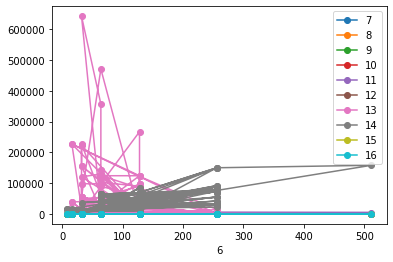

In [ ]:
# Inspect the data using the plot command that is available with the dataframe
# We use the plot function that is built into pandas for this simple data display
df2_copy.plot(marker = 'o')

In [ ]:
import pandas as pd 

In [ ]:
MM_df = pd.DataFrame()

In [ ]:
MM_df['pNPP (mM)'] = df2_copy.columns

In [ ]:
slopes = []

In [ ]:
for column in df2_copy.columns:
    slope, _, _, _, _, = stats.linregress(df2_copy.index, df2_copy[column])
    slopes.append(slope)

In [ ]:
slopes

[0.023266595847329413,
 0.0012696653229775732,
 0.0030005607110595374,
 0.0005087531100854595,
 -1.7500750890198382,
 7.013670984350524e-05,
 -216.0651147457618,
 232.56222905777244,
 -3.613968870796807e-05,
 -0.20252471502695218]

In [ ]:
print(MM_df['pNPP (mM)'] )

0     7
1     8
2     9
3    10
4    11
5    12
6    13
7    14
8    15
9    16
Name: pNPP (mM), dtype: object


In [ ]:
# Populate the new dataframe with the slopes

MM_df['slopes'] = slopes

# Check the dataframe
MM_df

# Make 'pNPP (mM) the index'
MM_df.set_index('pNPP (mM)', inplace=True)
MM_df.head()

,slopes
pNPP (mM),
7,0.023267
8,0.001270
9,0.003001
10,0.000509
11,-1.750075


In [ ]:
MM_df['initial velocities'] = MM_df['slopes'] / 0.015
MM_df

,slopes,initial velocities
pNPP (mM),,
7,0.023267,1.551106
8,0.001270,0.084644
9,0.003001,0.200037
10,0.000509,0.033917
11,-1.750075,-116.671673
12,0.000070,0.004676
13,-216.065115,-14404.340983
14,232.562229,15504.148604
15,-0.000036,-0.002409


In [ ]:
MM_df.head()

,slopes,initial velocities
pNPP (mM),,
7,0.023267,1.551106
8,0.001270,0.084644
9,0.003001,0.200037
10,0.000509,0.033917
11,-1.750075,-116.671673


In [ ]:
MM_df['pNPP (mM)'] = df2_copy.columns

In [ ]:
print(MM_df['pNPP (mM)'] )

pNPP (mM)
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
Name: pNPP (mM), dtype: object


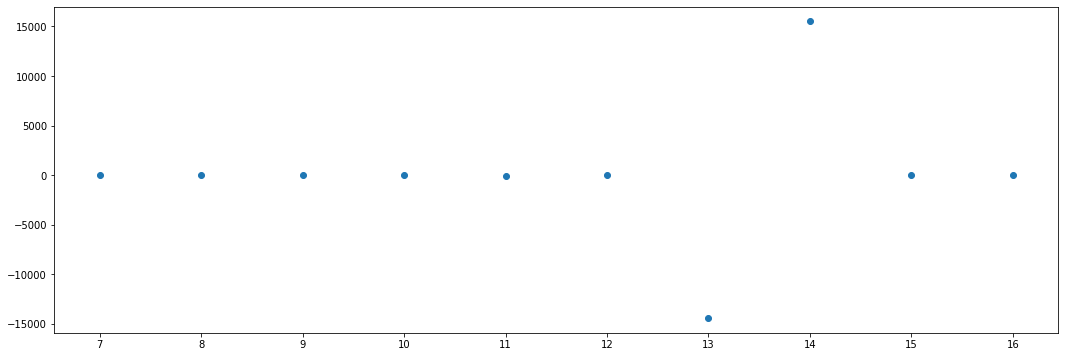

In [ ]:
ydata = MM_df['initial velocities']
xdata = MM_df['pNPP (mM)']

# Inspect your data to make sure it looks like a Michaelis-Menten plot
plt.figure(figsize=(18,6))
plt.plot(xdata, ydata, 'o', label='data')

In [ ]:
# Create a function for the equation you want to fit. The function should accept 
# as inputs the independent variable(s) and all the parameters to be fit.

def MM(SubConc, Vmax, Km):
    Vi = Vmax * SubConc/(Km + SubConc)
    return Vi

# Test the function to see if it produces the expected output



In [ ]:
import pandas as pd
MM_df = pd.df2_copy()

AttributeError: ignored

In [ ]:
MM(MM_df['pNPP (mM)'], 100, 1 )

TypeError: ignored

In [ ]:
MM_df

,slopes,initial velocities,pNPP (mM)
pNPP (mM),,,
7,0.023267,1.551106,7
8,0.001270,0.084644,8
9,0.003001,0.200037,9
10,0.000509,0.033917,10
11,-1.750075,-116.671673,11
12,0.000070,0.004676,12
13,-216.065115,-14404.340983,13
14,232.562229,15504.148604,14
15,-0.000036,-0.002409,15


In [ ]:
ydata = MM_df('initial velocities')

TypeError: ignored

In [ ]:
# Use the function curve_fit to fit your data.
popt, pcov = curve_fit(MM, xdata, ydata)

TypeError: ignored

In [ ]:
# Extract the fit parameters from the output of curve_fit.
Vmax = popt[0]
Km = popt[1]

# Extract one standard deviation for each parameter
stdev = np.sqrt(np.diag(pcov)) # returns one standard deviation for each parameter
print('Vmax for this reaction:', Vmax, '+/-', stdev[0])
print('Km for this reaction:', Km, '+/-', stdev[1])

NameError: ignored

In [ ]:
df2_copy

,7,8,9,10,11,12,13,14,15,16
6,,,,,,,,,,
64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...
32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42


In [ ]:
plt.figure(figsize=(8,5))
xdata, ydata = (df2_copy["2"].values, df2_copy["13"].values)
plt.plot(xdata, ydata, 'ro')
plt.plot(ydata,xdata)
plt.show()

KeyError: ignored

<Figure size 576x360 with 0 Axes>

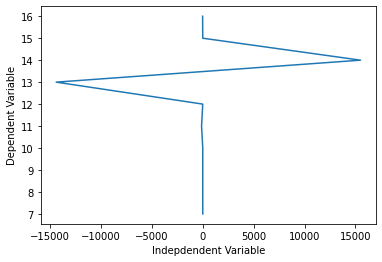

In [ ]:
plt.plot(ydata,xdata) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

next part one to one


In [ ]:
df2_copy

,7,8,9,10,11,12,13,14,15,16
6,,,,,,,,,,
64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...
32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42


In [ ]:
df = df2_copy.copy()
df

,7,8,9,10,11,12,13,14,15,16
6,,,,,,,,,,
64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...
32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42


In [ ]:
df= df.drop(['7','8','9','10','11','12','13','14','15'],axis= 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 64 to 32
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   16      430 non-null    float64
dtypes: float64(1)
memory usage: 6.7 KB


In [ ]:
df

,16
6,
64,127.52
64,1.39
64,127.52
64,23.07
128,5.15
...,...
32,1.50
64,1.73
128,3.42


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Flipkart Mobile - 2.csv to Flipkart Mobile - 2.csv


In [ ]:
import io 
dd = pd.read_csv(io.BytesIO(uploaded['Flipkart Mobile - 2.csv']))

In [ ]:
dd

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77


In [ ]:
dd.columns

Index(['brand', 'model', 'base_color', 'processor', 'screen_size', 'ROM',
       'RAM', 'display_size', 'num_rear_camera', 'num_front_camera',
       'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price',
       'discount_percent', 'sales'],
      dtype='object')

In [ ]:
dd = dd.drop(['brand', 'model', 'base_color', 'processor', 'screen_size','RAM', 'display_size', 'num_rear_camera', 'num_front_camera',
       'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price',
       'discount_percent'],axis= 1)
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ROM     430 non-null    int64  
 1   sales   430 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.8 KB


In [ ]:
dd

,ROM,sales
0,64,127.52
1,64,1.39
2,64,127.52
3,64,23.07
4,128,5.15
...,...,...
425,32,1.50
426,64,1.73
427,128,3.42
428,32,6.77


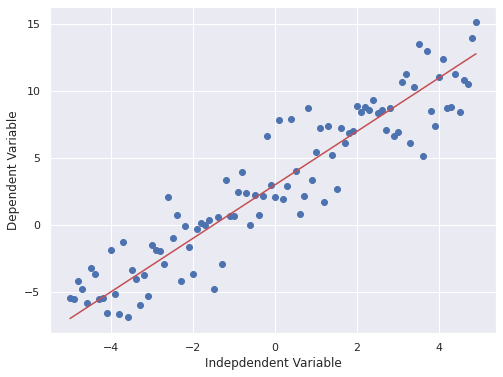

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
#You can adjust the slope and intercept to verify the changes in the graph.
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

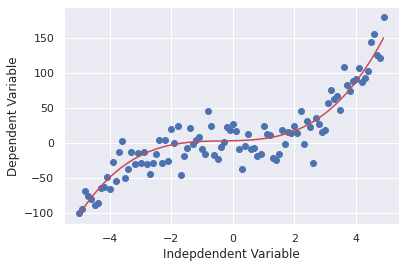

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
#You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [ ]:
dd

,ROM,sales
0,64,127.52
1,64,1.39
2,64,127.52
3,64,23.07
4,128,5.15
...,...,...
425,32,1.50
426,64,1.73
427,128,3.42
428,32,6.77


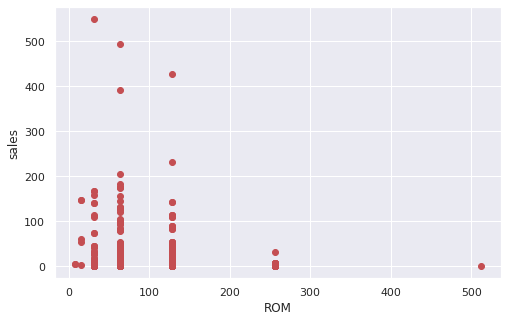

In [ ]:
plt.figure(figsize=(8,5))
x_data, y_data = (dd["ROM"].values, dd["sales"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('sales')
plt.xlabel('ROM')
plt.show()

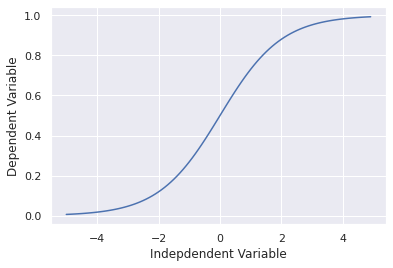

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

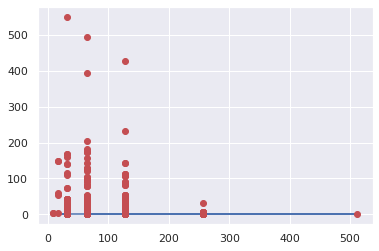

In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y
beta_1 = 0.10
beta_2 = 1990.0
#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)
#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [ ]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
# Now we plot our resulting regression model.
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

RuntimeError: ignored

In [ ]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata,p0=[1,1], maxfev=5000)

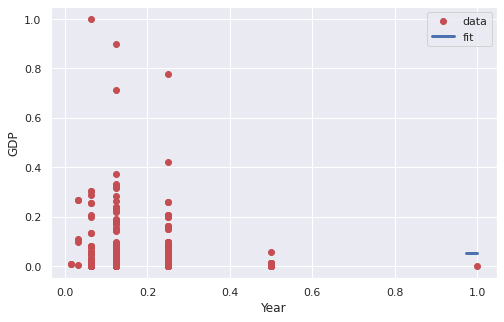

In [ ]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]
# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y,p0=[1,1], maxfev=5000)
# predict using test set
y_hat = sigmoid(test_x, *popt)
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y))

Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01
R2-score: -25924344995.53


logistic reg


In [ ]:
dd

,ROM,sales
0,64,127.52
1,64,1.39
2,64,127.52
3,64,23.07
4,128,5.15
...,...,...
425,32,1.50
426,64,1.73
427,128,3.42
428,32,6.77


In [ ]:
dd.columns

Index(['ROM', 'sales'], dtype='object')

In [ ]:
print(dd.ROM)

0       64
1       64
2       64
3       64
4      128
      ... 
425     32
426     64
427    128
428     32
429     32
Name: ROM, Length: 430, dtype: int64


In [ ]:
x= dd[(dd['sales'].f.contains("sales"))]

AttributeError: ignored

In [ ]:
x = np.arange(dd[dd['sales']])

KeyError: ignored

In [ ]:
y = np.array(dd.ROM)

In [ ]:
y

array([ 64,  64,  64,  64, 128,  64, 128,  64, 128, 128,  64, 128, 128,
       256, 128, 128,  64,  64,  64, 256, 256, 128, 256,  64, 128, 128,
       256,  64,  64, 128,  64, 128, 256,  64, 256,  64, 256, 256, 128,
       256, 128, 256,  64,  32, 128, 128, 128,  64,  64,  64,  64, 128,
       128,  64,  64, 256,  64,  64,  64,  32,  64,  32,  64,  64,  64,
        64,  64, 128,  64,  32,  64, 128, 128, 128, 128, 128,  64, 128,
       128, 128, 128, 128, 128, 128, 128,  64, 128,  64,  64,  64,  64,
       128, 256, 256, 128, 128, 128, 256, 128, 128,  64,  64, 128, 128,
        64,  64, 128, 128, 128, 128, 128,  64,  32,  32,  32,  32,  64,
        64,  64,  64, 128, 128,  64,  32,  64,  32,  64,  64,  64,  64,
        64,  64, 128, 128,  32, 128, 128, 128,  64,  64, 128,  32, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 256, 128,  64,  64,
        64,  32,  32,  32, 128, 128, 128, 128, 128, 128, 128, 128, 256,
       256, 128, 128, 128, 256, 256, 128, 256, 128, 128, 128,  6

In [ ]:
x

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
import io 
dd = pd.read_csv(io.BytesIO(uploaded['Flipkart Mobile - 2.csv']))

In [25]:
dd

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77


In [26]:
dd = dd.drop(['brand', 'model', 'base_color', 'processor', 'screen_size','RAM', 'display_size', 'num_rear_camera', 'num_front_camera',
       'sales', 'ratings', 'num_of_ratings', 'sales_price',
       'discount_percent'],axis= 1)
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ROM               430 non-null    int64
 1   battery_capacity  430 non-null    int64
dtypes: int64(2)
memory usage: 6.8 KB


In [27]:
dd

,ROM,battery_capacity
0,64,1800
1,64,2815
2,64,1800
3,64,2942
4,128,2815
...,...,...
425,32,4000
426,64,4000
427,128,4250
428,32,5000


In [28]:
y = np.array(dd.ROM)

In [29]:
y.size

430

In [30]:
x = np.array(dd.battery_capacity).reshape(-1, 1)

In [31]:
x.size

430

In [32]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [33]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [34]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [37]:
model.classes_

array([  8,  16,  32,  64, 128, 256, 512])

In [38]:
model.intercept_

array([-3.14395404e-07, -2.75528666e-07, -1.09454440e-07, -3.79460975e-08,
       -7.14698964e-01, -1.11331406e-07, -4.13389708e-01])

In [39]:
model.coef_

array([[-0.00146195],
       [-0.001104  ],
       [-0.00041329],
       [-0.00015956],
       [ 0.00011781],
       [-0.00055339],
       [-0.00138969]])

evaluation


In [43]:
model.predict_proba(x)

array([[0.04102345, 0.07366156, 0.19684199, ..., 0.23030901, 0.16480071,
        0.03142257],
       [0.01255623, 0.03345796, 0.18614116, ..., 0.31699028, 0.13603101,
        0.01020917],
       [0.04102345, 0.07366156, 0.19684199, ..., 0.23030901, 0.16480071,
        0.03142257],
       ...,
       [0.00193969, 0.00881689, 0.14288759, ..., 0.43351813, 0.08435053,
        0.00174446],
       [0.00069935, 0.00417367, 0.11758045, ..., 0.49021925, 0.06186212,
        0.00066388],
       [0.00271083, 0.01124481, 0.15135118, ..., 0.41391141, 0.09281755,
        0.00239467]])

In [46]:
model.predict(x)

array([ 64, 128,  64, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128,  64, 128, 128, 128,
       128, 128, 128,  64,  64, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 12

In [47]:
x.size

430

In [48]:
model.score(x, y)

0.4558139534883721

In [49]:
confusion_matrix(y, model.predict(x))

array([[  0,   0,   0,   0,   2,   0,   0],
       [  0,   0,   0,   0,   5,   0,   0],
       [  0,   0,   0,   1,  53,   0,   0],
       [  0,   0,   0,   4, 134,   0,   0],
       [  0,   0,   0,   0, 192,   0,   0],
       [  0,   0,   0,   0,  38,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0]])

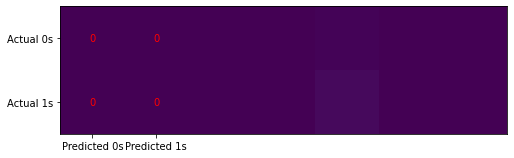

In [50]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [51]:
x.size

430

In [52]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           8       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         5
          32       0.00      0.00      0.00        54
          64       0.80      0.03      0.06       138
         128       0.45      1.00      0.62       192
         256       0.00      0.00      0.00        38
         512       0.00      0.00      0.00         1

    accuracy                           0.46       430
   macro avg       0.18      0.15      0.10       430
weighted avg       0.46      0.46      0.30       430



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [58]:
model.intercept_

array([-3.14395402e-07, -2.75528669e-07, -1.09454440e-07, -3.79460975e-08,
       -1.45458994e+00, -1.11331406e-07, -2.16700696e+00])

In [59]:
model.coef_

array([[-0.00146195],
       [-0.001104  ],
       [-0.00041329],
       [-0.00015956],
       [ 0.00027329],
       [-0.00055339],
       [-0.00090757]])

In [60]:
model.predict_proba(x)

array([[0.04456722, 0.08002475, 0.21384601, ..., 0.18344079, 0.17903687,
        0.01451614],
       [0.01333337, 0.03552876, 0.19766193, ..., 0.278234  , 0.14445032,
        0.00732407],
       [0.04456722, 0.08002475, 0.21384601, ..., 0.18344079, 0.17903687,
        0.01451614],
       ...,
       [0.00197582, 0.0089811 , 0.14554892, ..., 0.42235804, 0.08592159,
        0.00238612],
       [0.00069215, 0.00413071, 0.11637032, ..., 0.49485623, 0.06122544,
        0.00126666],
       [0.00278516, 0.01155316, 0.15550143, ..., 0.3973714 , 0.09536273,
        0.00292901]])

In [63]:
model.predict(x)

array([ 64,  64,  64,  64,  64,  64,  64,  64,  64,  64,  64,  64,  64,
        64,  64,  64,  64,  64,  64,  64,  64,  64,  64,  64,  64,  64,
        64,  64,  64,  64,  64,  64,  64,  64,  64,  64,  64,  64,  64,
        64,  64,  64,  64,  64,  64,  64,  64,  64,  64,  64,  64,  64,
        64,  64,  64,  64, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 12

In [66]:
model.score(x, y)

0.4558139534883721

In [67]:
confusion_matrix(y, model.predict(x))

array([[  0,   0,   0,   2,   0,   0,   0],
       [  0,   0,   0,   3,   2,   0,   0],
       [  0,   0,   0,   3,  51,   0,   0],
       [  0,   0,   0,  26, 112,   0,   0],
       [  0,   0,   0,  22, 170,   0,   0],
       [  0,   0,   0,  14,  24,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0]])

In [68]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           8       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         5
          32       0.00      0.00      0.00        54
          64       0.37      0.19      0.25       138
         128       0.47      0.89      0.62       192
         256       0.00      0.00      0.00        38
         512       0.00      0.00      0.00         1

    accuracy                           0.46       430
   macro avg       0.12      0.15      0.12       430
weighted avg       0.33      0.46      0.36       430



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
x.size

430

In [70]:
y.size

430

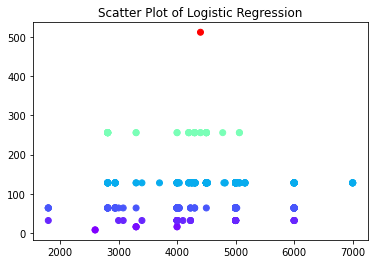

In [72]:
plt.scatter(x,y,c=y,cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()

type 2

In [75]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [74]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [80]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[-0.00057231]
 [-0.00025498]
 [ 0.00025663]
 [ 0.0004896 ]
 [ 0.00056038]
 [ 0.00013815]
 [-0.00061746]]
[-7.23260482e-08 -2.09722787e-08 -2.86543012e-07  3.04736871e-07
 -1.85791376e-07  4.44673601e-07 -1.83777757e-07]


In [81]:
y_pred = log_reg.predict(x_test)

In [82]:
confusion_matrix(y_test, y_pred)

array([[ 0,  0, 19,  0],
       [ 0,  0, 30,  0],
       [ 0,  0, 47,  0],
       [ 0,  0, 12,  0]])

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          32       0.00      0.00      0.00        19
          64       0.00      0.00      0.00        30
         128       0.44      1.00      0.61        47
         256       0.00      0.00      0.00        12

    accuracy                           0.44       108
   macro avg       0.11      0.25      0.15       108
weighted avg       0.19      0.44      0.26       108



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now we can see that our model performed really good or not based on precision and recall.

this is the simple logistic regression between ROM and	battery_capacity